In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
data3=pd.read_csv(r'C:\Users\kowsar\tmis.csv')

In [4]:
h=data3.head()
h

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63.0,1,True,True,True,Shahran,1850000000,61666.67
1,60.0,1,True,True,True,Shahran,1850000000,61666.67
2,79.0,2,True,True,True,Pardis,550000000,18333.33
3,95.0,2,True,True,True,Shahrake Qods,902500000,30083.33
4,123.0,2,True,True,True,Shahrake Gharb,7000000000,233333.33


In [28]:
xo=data3['Parking']
le = LabelEncoder()
encoded_data = le.fit_transform(xo)
data3['Parking'] = encoded_data

In [29]:
xo=data3['Elevator']
le = LabelEncoder()
encoded_data1= le.fit_transform(xo)
data3['Elevator'] = encoded_data1

In [30]:
xo=data3['Warehouse']
le = LabelEncoder()
encoded_data2 = le.fit_transform(xo)
data3['Warehouse'] = encoded_data2

In [31]:
h=data3.tail()
h

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
3326,86.0,2,1,1,1,Southern Janatabad,3500000000,116666.67
3327,83.0,2,1,1,1,Niavaran,6800000000,226666.67
3328,75.0,2,0,0,0,Parand,365000000,12166.67
3329,105.0,2,1,1,1,Dorous,5600000000,186666.67
3330,82.0,2,0,1,1,Parand,360000000,12000.00


In [32]:
df=pd.DataFrame(data3, columns=['Area', 'Price', 'Room', 'Parking', 'Elevator', 'Warehouse'])
df

,Area,Price,Room,Parking,Elevator,Warehouse
0,63.0,1850000000,1,1,1,1
1,60.0,1850000000,1,1,1,1
2,79.0,550000000,2,1,1,1
3,95.0,902500000,2,1,1,1
4,123.0,7000000000,2,1,1,1
...,...,...,...,...,...,...
3326,86.0,3500000000,2,1,1,1
3327,83.0,6800000000,2,1,1,1
3328,75.0,365000000,2,0,0,0
3329,105.0,5600000000,2,1,1,1


Text(0, 0.5, 'Price')

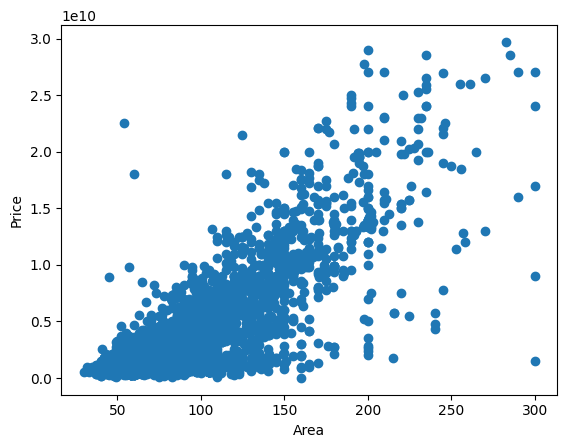

In [33]:
scatter=plt.scatter(df['Area'], df['Price'])
plt.xlabel('Area')
plt.ylabel('Price')

In [34]:
msk=np.random.rand(len(df))< 0.8
train=df[msk]
test=df[~msk]
print(msk)
print(train)
print(test)

[ True False  True ...  True  True  True]
       Area       Price  Room  Parking  Elevator  Warehouse
0      63.0  1850000000     1        1         1          1
2      79.0   550000000     2        1         1          1
3      95.0   902500000     2        1         1          1
4     123.0  7000000000     2        1         1          1
5      70.0  2050000000     2        1         0          1
...     ...         ...   ...      ...       ...        ...
3326   86.0  3500000000     2        1         1          1
3327   83.0  6800000000     2        1         1          1
3328   75.0   365000000     2        0         0          0
3329  105.0  5600000000     2        1         1          1
3330   82.0   360000000     2        0         1          1

[2682 rows x 6 columns]
       Area        Price  Room  Parking  Elevator  Warehouse
1      60.0   1850000000     1        1         1          1
11     64.0   2100000000     1        1         1          1
12     54.0   1690000000     1

In [35]:
from sklearn import linear_model
reg=linear_model.LinearRegression()
train_x=np.asanyarray(train[['Area', 'Room', 'Elevator', 'Parking', 'Warehouse']])
train_y=np.asanyarray(train[['Price']])
reg.fit(train_x, train_y)
coefficent=reg.coef_
intercept=reg.intercept_
print('coefficent', coefficent)
print('intercept',intercept)

coefficent [[ 9.55323755e+07 -9.19371207e+08  4.75350800e+08  4.20145322e+08
   3.87590402e+08]]
intercept [-4.24180566e+09]


In [36]:
from sklearn.metrics import r2_score
y_hat=reg.predict(np.asanyarray(test[['Area', 'Room', 'Elevator', 'Parking', 'Warehouse']]))
xo=np.asanyarray(test[['Area', 'Room', 'Elevator', 'Parking', 'Warehouse']])
y=np.asanyarray(test[['Price']])
MSE=np.mean((y_hat - y)**2)
print('MSE',MSE)
print('variance score',reg.score(xo,y))
r2=r2_score(y, y_hat)
print(r2)

MSE 6.080842239108199e+18
variance score 0.6831448430520382
0.6831448430520382


In [37]:
house_price=reg.predict([[1000, 2, 1, 1, 1]])
house_price

array([[9.0734914e+10]])